In [1]:
import pandas as pd
import numpy 
df = pd.read_csv("dataset.csv")
df = df.iloc[:4,:5]

In [2]:
print(df.head())

    Q1   Q2   Q3   Q4   Q5
0  325   72  184  405  431
1  229  235  141  482  170
2   37  172   78  319  220
3  224  465  421  101  236


In [3]:

data = numpy.array(df)

R = data

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.00001, beta=0.001):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter
    '''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:

            break

    return P, Q.T
 



In [4]:
def rmse(R,K):
    R = numpy.array(R)
    N = len(R)
    M = len(R[0])
    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)
    nP, nQ = matrix_factorization(R, P, Q, K)
    nR = numpy.dot(nP, nQ.T)
    return numpy.sqrt(((nR - R) ** 2).mean())
data = {}
for k in range(1,20):
    data[k] = rmse(R,k)
    print(data)

{1: 117.89649543866977}
{1: 117.89649543866977, 2: 61.21220174858611}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038, 5: 0.00100353287755508}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038, 5: 0.00100353287755508, 6: 0.0009989960833409483}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038, 5: 0.00100353287755508, 6: 0.0009989960833409483, 7: 0.0010010202038673811}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038, 5: 0.00100353287755508, 6: 0.0009989960833409483, 7: 0.0010010202038673811, 8: 0.0009989614965955904}
{1: 117.89649543866977, 2: 61.21220174858611, 3: 29.48430477822344, 4: 0.019140494340558038, 5: 0.00100353287755508, 6: 0.0009989960833409483, 7:

Defaulting to user installation because normal site-packages is not writeable


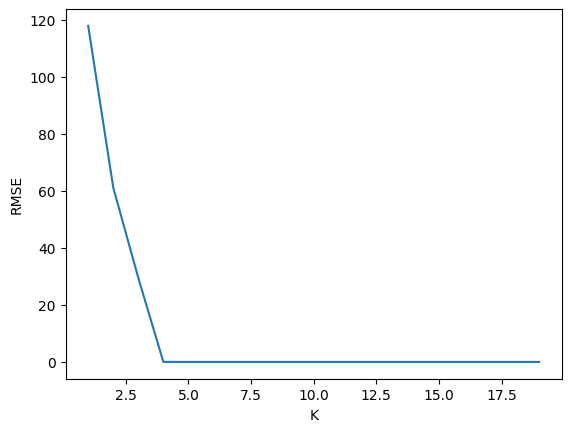

In [5]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(list(data.keys()), list(data.values()))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()
